# Neural Networks

Artificial neural networks (ANN) or connectionist systems are computing systems vaguely inspired by the biological neural networks that constitute animal brains. The neural network itself is not an algorithm, but rather a framework for many different machine learning algorithms to work together and process complex data inputs. Such systems "learn" to perform tasks by considering examples, generally without being programmed with any task-specific rules (text from [Wikipedia](https://en.wikipedia.org/wiki/Artificial_neural_network). It turns out that when we have a dataset with many features, the implementation of traditional linear and logistic regression models becomes infeasible. Since for reproduce complex boundary decisions it is necessary high order polynomials computation, which will result in more features (as it was done and discussed in [Logistic Regression repository](https://github.com/gsoumoreira/LogisticRegression_Python)). Neural networks may be a good alternative for do such big data computation.
Before continue with the exercise, it is important to understand neural netoworks implementation and technical terms. **Figure 1** shows a typical neural network representation with the main components.



<html>
<p>
<p>
<body>
    <div align="center">
        <img src="Images/Neural_Net_Draw.png" 
        width = "700" /><p>
    </div>
</body>
<body>
    <div align="center">
     Figure 1 - Typical neural network with three layers
    </div>
    <p>
    <p>
</body>
</html>

the blue circles are the _**input nodes**_ and all the input nodes represent the _**input layer**_ and in this case, it is the first layer. This layer adress dataset input in the neuron network. The yellow circles are the _**activation nodes**_ which compute an _**activation function**_ of an input. (For instance, compute the _**sigmoid function**_ of each input of the first layer). **Equation 1** shows the mathematical representation of **Figure 1**

$$ a_1^{(2)} = g(\Theta_{10}^{(1)}x_0 + \Theta_{11}^{(1)}x_1 + \Theta_{12}^{(1)}x_2 + \Theta_{13}^{(1)}x_3)$$

$$ a_2^{(2)} = g(\Theta_{20}^{(1)}x_0 + \Theta_{21}^{(1)}x_1 + \Theta_{22}^{(1)}x_2 + \Theta_{23}^{(1)}x_3)$$

$$ a_3^{(2)} = g(\Theta_{30}^{(1)}x_0 + \Theta_{31}^{(1)}x_1 + \Theta_{32}^{(1)}x_2 + \Theta_{33}^{(1)}x_3)$$


$$ h_\Theta (x) = a_1^{(3)} = g(\Theta_{10}^{(2)}a_{0}^{(2)} + \Theta_{11}^{(2)}a_{1}^{(2)} + \Theta_{12}^{(2)}a_{2}^{(2)} + \Theta_{13}^{(2)}a_{3}^{(2)}) \quad\quad (1) $$


We can define: 

$$a_i^{(j)} = \text{activation of unit i in layer j}$$.
$$\Theta_{(j)} = \text{Matrix of weights controlling function mapping from layer j to j + 1}$$. 

The _**weights**_ were previously called _**parameters**_ of the hypothesis. 

Important know why neural networks become important and popular nowadays. Over the last 10 years, the amount of data (regarding many fields) increased really fast. Comparing the performance over the traditional learning algorithm and neural networks (**Figure**) it is possible to see the increase of the performance when goes to **_huge amount of data_** using neural networks. Following the increase of the data amount, the cpu and gpu performance also makes neural network much more feasible today. And finally, the neural network algorithm also received many improvements and innovations wich made NN runs much faster than before. As an example, one breakthrough that made gradient descent in NN runs much faster was switch the sigmoid activation function (from [logistic regression](https://github.com/gsoumoreira/LogisticRegression_Python)) to **_Relu_** activation function (which will be discussed later in this notebook). Thi

<html>
<p>
<p>
<body>
    <div align="center">
        <img src="Images/Data_Performance.png" 
        width = "700" /><p>
    </div>
</body>
<body>
    <div align="center">
     Figure 2 - Peformance x amount of data in traditional ML algorithm and NN
    </div>
    <p>
    <p>
</body>
</html>




In this repository, we will use data from Coursera's course Machine Learning (Professor Andrew Ng from Stanford University), as well as follow the development steps of code and theory proposed by the course itself. However, python will be the programming language used, with the purpose of exercising the development of Neural Network in another language, as well as discussing other possible paths that python libraries provide.



## First Exercise

For this exercise, you will use logistic regression and neural networks to recognize handwritten digits (from 0 to 9). Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. This exercise will show you how the methods you’ve learned can be used for this classification task.

## Importing the python and created libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

##  Importing and organazing dataset

The dataset is a matlab file that contains 5000 training examples of handwritten digits.  where each training example is a 20 pixel by 20 pixel grayscale image of the digit. Each pixel is represented by a floating point number indicating the grayscale intensity at that location. The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional] vector. Each of these training examples becomes a single row in our data matrix _**X**_. This gives us a 5000 by 400 matrix _**X**_ where every row is a training example for a handwritten digit image.
The second part of the training set is a 5000-dimensional vector _**y**_ that contains labels for the training set. To make things more compatible with Octave/MATLAB indexing, where there is no zero index, we have mapped the digit zero to the value ten. Therefore, a “0” digit is labeled as “10”, while the digits “1” to “9” are labeled as “1” to “9” in their natural order. In order to use pandas, I converted the orginal ex1_Data.mat file in two csv files coitaining the _**X**_ and _**y**_ dataset described.

In [2]:
# Path do the Dataset
pathtodataX = 'Exercise_Data/ex1_X.csv'
pathtodataY = 'Exercise_Data/ex1_y.csv'

# Importing the dataset (matlab format)
X = pd.read_csv(pathtodataX,delimiter = ',',header=None)
y = pd.read_csv(pathtodataY,delimiter = ',',header=None)

(-0.5, 99.5, 19.5, -0.5)

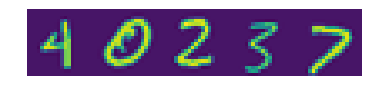

In [3]:
# 5 Random samples from the X dataset rows 
randomlist = np.random.choice(X.shape[0],5)

# Reshaping the data for 20x20 pixel side (each number will be sibe by side)
# Important note the reshape function should be aligned with the pixel data
draw = X.iloc[randomlist].values.reshape(-1,20).T
plt.imshow(draw)
plt.axis('off')

## The Sigmoid Function

The sigmoid functions (also known as logistic funtion) is represented in the **Equation 1** and has the characteristc of "S"-shaped curve. The function was named by [Pierre François Verhulst](https://en.wikipedia.org/wiki/Pierre_Fran%C3%A7ois_Verhulst) in his publication: _**Loi D'Accroissement de la population**_ or **Law of Population Growth**.

$$g(z) = \frac{1}{1+e^{-z}} \quad\quad (2)$$

For more details about the sigmoid function and how is the implementation, check the [Logistic Regression repository](https://github.com/gsoumoreira/LogisticRegression_Python) 

In [4]:
def sigmoid(z):
    
    g = 1/(1+(np.exp(-z)))

    return g

## Vectorizing  regularized logistic regression

You will be using multiple one-vs-all logistic regression models to build a multi-class classifier. Since there are 10 classes, you will need to train 10 separate logistic regression classifiers. To make this training efficient, it is important to ensure that your code is well vectorized.
**Equation 2** shows the vectorized form of the regularized cost function and **Equation 3** shows the vectorized form of the gradient.

$$ J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big) + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}\quad\quad (3)$$

$$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y) + \frac{\lambda}{m}\theta_{j}\quad\quad\text{for j > 0}\quad\quad (4)$$

Where $\lambda$ is the **Regularized Parameter**. The main idea in use regularization is to reduce the influence of some features in the hypothesis. Check the [Logistic Regression repository](https://github.com/gsoumoreira/LogisticRegression_Python) for more details.

In [5]:
def computeCostReg(theta, reg, x, y):

    # Hypothesis function g(X*Theta)
    hip = sigmoid(x.dot(theta))
    
    # The regularized cost Function
    J = -1*(1/len(y))*(np.log(hip).T.dot(y)+np.log(1-hip).T.dot(1-y))
    + (reg/(2*len(y)))*np.sum(np.square(theta[1:]))
    
    return float (J)

In [6]:
def gradientReg(theta, reg, x, y):

    # Hypothesis function g(X*Theta)
    hip = sigmoid(x.dot(theta.reshape(-1,1) ))
    
    # The Regularized gradient (Changing the theta[0] to 0 temporaly)
    theta_0 = theta[0]
    theta[0] = 0
    grad = (1/len(y))*x.T.dot(hip-y) + (reg/len(y))*theta.reshape(-1,1) 
    theta[0] = theta_0
    
    return grad.flatten()

## One vs all classification

In this part of the exercise, we will implement one-vs-all classification by training multiple regularized logistic regression classifiers, one for each of the K classes in our dataset (0 to 9 handwrite digit). It will be used the _**minimize()**_ function to find the best hypothesis paramerters (as also used and explained in [Logistic Regression repository](https://github.com/gsoumoreira/LogisticRegression_Python)) and **Figure 2** shows the prediction plot using this hypothesis.

In [7]:
# Inserting the X0 with zero values
X.insert(loc=0, column='X0', value=np.zeros(X.values.shape[0]))

# Number of classes 
K = 10

In [8]:
from scipy.optimize import minimize

def oneVsAll(X, y, K, reg):
    
    # Creatting the 1D array theta_initial values with X size (401)
    initial_theta = np.zeros(X.shape[1])
    
    # Creatting the theta variable with X size and number of K classifiers
    theta = np.zeros([K,X.shape[1]])
    
    # Compute the best parameter for each class (0 to 9)
    for i in range(1, K+1):
            
    # computeCostReg must return a float and the parameter to be optimizer must
    # be 1D array (initial_theta ) and also must be the first arugment
    # computeCostReg(theta,....) // (y == i)*1) = 0 or 1 for each class (K)
        best_Hyp = minimize(computeCostReg, initial_theta,
                       args=(reg, X, (y == i)*1), method='TNC',jac=gradientReg)
    
    # Adjusting the index (0-9) with the K classifiers (1-10)
        theta[i-1] = best_Hyp.x
        
    return theta

In [9]:
# Computting oneVsAll to get optimized theta
bestTheta = oneVsAll(X.values, y.values, K, 0.1)

In [10]:
def predictOneVsAll(theta, X):
    
    # X(5000x401) dot theta(401x10) = (5000x10)
    predict = sigmoid(X.dot(theta.T))
        
    # Adjusting the index (0-9) with the K classifiers (1-10)
    # Returning the column index K (1-10) with the highest value (the most
    # probably handwrite digit)
    return (np.argmax(predict, axis=1)+1)

In [11]:
# Computting the prediction
pred = pd.DataFrame(predictOneVsAll(bestTheta, X.values))
print('Training set accuracy: {} %'.format(np.mean(pred == y)*100))

Training set accuracy: 0    95.96
dtype: float64 %


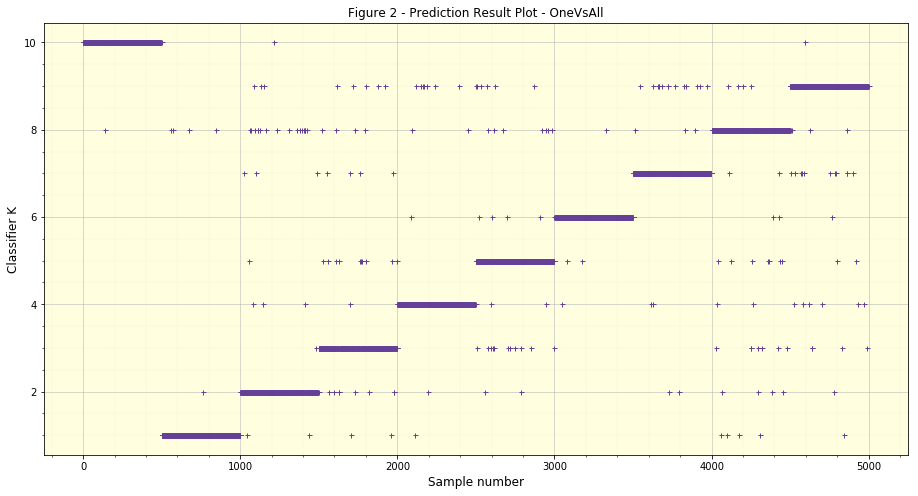

In [12]:
import MLplot as pl

# list with number of trainning data
num_data = list(range(5000))

# Plotting the prediction result
predplot = pl.plot2D(num_data,pred)
predplot.set_ylabel(r'Classifier K',fontsize=12)
predplot.set_xlabel(r'Sample number',fontsize=12)
predplot.set_title('Figure 2 - Prediction Result Plot - OneVsAll');

## Neural Networks - Feedforward propagation

In this part of the exercise, you will implement a neural network to recognize handwritten digits using the same training set as before. The neural network will be able to represent complex models that form non-linear hypothesis. You will be using parameters from a neural network that we have already trained. The goal is to implement the _**feedforward propagation**_ algorithm using the weights provided in _**weights1.csv and weights2.csv**_. The feedfoward propagation might be interpreted as the computation of the layers as was shown in **Figure 1** and **Equation 1**, from the input layer flowing to the output. Later on, the _**backpropagation**_ will be implemented and it will linke directly with _**weights**_ optimization discussion. For now, the optimum weights are given in the files: _**weights1.csv and weights2.csv**_).

In [13]:
pathtodataW1 = 'Exercise_Data/weights1.csv'
pathtodataW2 = 'Exercise_Data/weights2.csv'

# Importing the dataset (matlab format)
weights1 = pd.read_csv(pathtodataW1,delimiter = ',',header=None) # 25x401 size
weights2 = pd.read_csv(pathtodataW2,delimiter = ',',header=None) # 10x26 size

In [14]:
# Changing the X0 values  
X['X0'] = 1

In [15]:
def predict(weights1, weights2, X):
    
    # The second (First hidden) layer it will be the X.weights1
    # (Which correspond a 25 nodes layer ) 
    a2 = sigmoid(X.dot(weights1.T))

    # Adding bias to the second hidden layer
    a2 = np.c_[np.ones((a2.shape[0],1)),a2]
    
    # The third (second hidden and output layer) layer it will be the 
    # z2.weights (Which correspond a 10 nodes layer (0-9 digit)) 
    a3 = sigmoid(a2.dot(weights2.T))

    # Adjusting the index (0-9) with the K classifiers (1-10)
    # Returning the column index K (1-10) with the highest value (the most
    # probably handwrite digit)
    return (np.argmax(a3, axis=1)+1) 

In [16]:
predNN = pd.DataFrame(predict(weights1.values, weights2.values, X.values))

In [17]:
# Computting the prediction
print('Training set accuracy: {} %'.format(np.mean(predNN == y)*100))

Training set accuracy: 0    97.52
dtype: float64 %


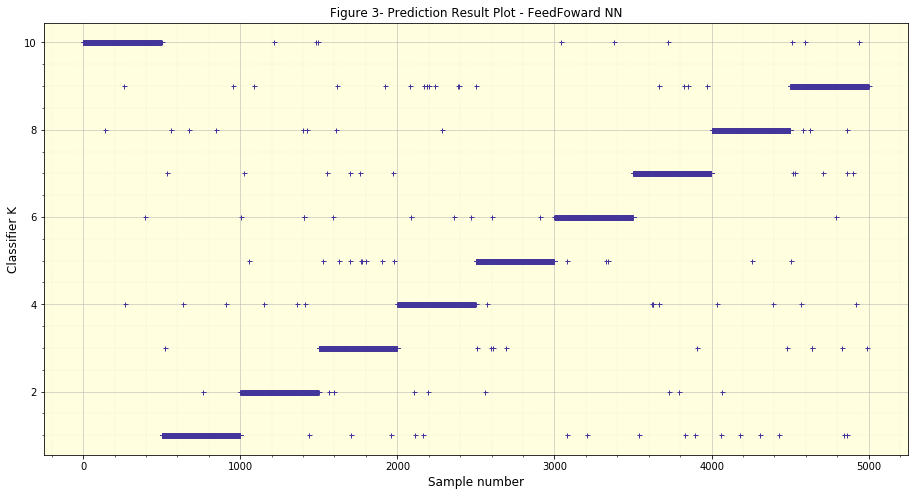

In [18]:
# Plotting the prediction result
predNNplot = pl.plot2D(num_data,predNN)
predNNplot.set_ylabel(r'Classifier K',fontsize=12)
predNNplot.set_xlabel(r'Sample number',fontsize=12)
predNNplot.set_title('Figure 3- Prediction Result Plot - FeedFoward NN');

## General cost function in NN

Since neural networks has a different architecture implementation, the previous cost function expression used for logistic and linear regression is not appropriate anymore. The new cost function is described in **Equation 5** where now the layers of the neural networks are taken account. 

$$ J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}\bigg[y^{(i)}_{k}\, log\,(( h_\theta\,(x^{(i)}))_k)+(1-y^{(i)}_k)\,log\,(1-h_\theta(x^{(i)}))_k)\bigg] + \frac{\lambda}{2m}\sum_{l=1}^{L-1}\sum_{i=1}^{s_l}\sum_{j=1}^{s_l+1}(\Theta_{j,i}^{(l)})\quad\quad (5)$$

where the variables:

* $L = $ Total number of layers in the network
* $s_l = $ Number of units (not counting bias unit) in layer l
* $K = $ Number of output units/classes

Recall that in neural networks, we may have many output nodes. We denote $h_\Theta(x)_{k}$  as being a hypothesis that results in the $k^{th}$ output.
For this particular neural network (one hidden layer with 25 units and one output layer with 10 units) the cost function can be represented as in **Equation 6**:

$$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}\bigg[-y^{(i)}_{k}\, log\,(( h_\theta\,(x^{(i)}))_k)-(1-y^{(i)}_k)\,log\,(1-h_\theta(x^{(i)}))_k)\bigg] + \frac{\lambda}{2m}\bigg[\sum_{j=1}^{25}\sum_{k=1}^{400}(\Theta_{j,k}^{(1)})^2+\sum_{j=1}^{10}\sum_{k=1}^{25}(\Theta_{j,k}^{(2)})^2\bigg]\quad\quad (6)$$ 

## Backpropagation

"Backpropagation" is neural-network terminology for minimizing the cost function (just as gradient descent in logistic and linear regression). As gradient descent, backpropagation equation is the partial derivative of the cost function in respect with theta(or weigths) as represented in **Equation 7**. However, since the cost function for neural networks are more complex (since now we have layers) the partial derivative is also complex. In order to understand concretely backpropagation, we can organize this complex implementation in steps.
Before goes into the steps, it is important have some feeling about what is backpropagations is doing. Given a training example $(x^{(t)} ,y^{(t)} )$, we will first run a “forward pass” to compute all the activations throughout the network, including the output value of the hypothesis $h_{\Theta}(x)$. Then, for each node $j$ in layer $l$, we would like to compute an “error term” $ \delta^{(l)}_j$ that measures how much that node was “responsible” for any errors in our output.

$$ Backpropagation = \frac{\partial}{\partial \Theta_{i,j}^{(l)}} J(\Theta)\quad\quad (7) $$

for compute such partial derivative we have first to:

* 1 -  Perform forward propagation
* 2 - compute $\delta^{(L)} = a^{(L)} - y^{(t)}$ (Where L is our total number of layers and $a^{(L)}$ is the vector of outputs of the activation units for the last layer
* 3 - Compute $\delta^{(L-1)}, \delta^{(L-2)},\dots,\delta^{(2)}$ using $\delta^{(l)} = ((\Theta^{(l)})^T \delta^{(l+1)})\ .*\ a^{(l)}\ .*\ (1 - a^{(l)})$ where $(.*)$ is the element wise multiplication
* 4 - Compute $\Delta^{(l)}_{i,j} = \Delta^{(l)}_{i,j} \pm a^{(l)}_{j}\delta^{(l+1)}_i$  or with vectorization, $\Delta^{(l)} := \Delta^{(l)} \pm \delta^{(l+1)}(a^{(l)})^T$

When we update the $\Delta$ matrix:

* $D^{(l)}_{i,j} := \frac{1}{m} (\Delta^{(l)}_{i,j} +\lambda\Theta_{i,j}^{(l)}) \quad\text{if j} \neq 0$ 
* $D^{(l)}_{i,j} := \frac{1}{m} \Delta^{(l)}_{i,j} \quad\text{if j} = 0$

The capital-delta matrix D is used as an "accumulator" to add up our values as we go along and eventually compute our partial derivative. At the end, the we can set the final backpropagation as **Equation 8**:

$$ D^{(l)}_{i,j}= \frac{\partial}{\partial \Theta_{i,j}^{(l)}} J(\Theta)\quad\quad (8) $$

As gradient descent, the backpropagation returns the optimized weights (thetas) to reduce the cost function.

## Sigmoid Gradient

In order to perform backpropagation the sigmoid gradient should be computed. The sigmoid gradient is the derivative of the sigmoid (**Equation 2**) in respect of z (In neural networks, the z is the computation of weights with previous layer nodes output). **Equation 9** shows the sigmoid gradient:

$$g \ '(z) = g(z)\ .*\ (1 - g(z))\quad \quad \text{or}\quad \quad g \ '(z^{(l)}) = a^{(l)}\ .*\ (1 - a^{(l)})\quad \quad (9) $$

where $(.*)$ is the element wise multiplication and $a^{(l)}$ is the **node vector** (vector that represents the nodes of each layer - **sigmoid (z)**)

In [19]:
def sigmoidGradient(z):
    
    return(sigmoid(z)*(1-sigmoid(z)))

In [39]:
# Forward prop. and backpropagation for this particular neuron network (1 hidden
# layer + 1 output layer) Returning the Cost Function History and the D matrix
def nnForwAndBack(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, reg, interations):
    
    # Cost function zero vector creation
    J = np.zeros(interations)
    
    # Number of interations through the neural networks (Forward and Back propagation)
    for i in range(interations):
        
        # Initial condition - Setting the first arguments 
        if i == 0:
            
            # Reshapping the input weigths into the matrix form
            weights1 = nn_params[0:(hidden_layer_size*(input_layer_size+1))].reshape(hidden_layer_size,(input_layer_size+1))
            weights2 = nn_params[(hidden_layer_size*(input_layer_size+1)):].reshape(num_labels,(hidden_layer_size+1))
    
            # Length of input dataset
            m = X.shape[0]
    
            # Intelligent get_dummies function which return a matrix with the 
            # data patterns represented by 1 and labeled by column index
            y_matrix = pd.get_dummies(y.flatten()).values
    
            ## Feedfoward propagation
    
            # First layer - Input layer
            a1 = X
    
            # Second layer (hidden layer) - OBS: Adding bias with ones (np.c_)
            z2 = weights1.dot(a1.T)
            a2 = np.c_[np.ones((X.shape[0],1)),sigmoid(z2.T)]
    
            # Third layer (output layer)
            z3 = weights2.dot(a2.T)
            a3 = sigmoid(z3)

            # The cost function 
            J[i] = (-1)*(1/m)*np.sum((np.log(a3.T)*(y_matrix)+np.log(1-a3).T*(1-y_matrix)))+ \
            (reg/(2*m))*(np.sum(np.square(weights1[:,1:]))+np.sum(np.square(weights2[:,1:])))

            ## Backpropagation
    
            # Second step backpropagation -> (a(L) - y)
            d3 = a3.T - y_matrix # 5000x10
    
            # Third step backpropagation -> (delta(L-1)...)
            d2 = weights2[:,1:].T.dot(d3.T)*sigmoidGradient(z2) # 25x10 *10x5000 * 25x5000 = 25x5000
        
            # Forth step backpropagation -> Computting the initial error term delta 
            delta1 = d2.dot(a1) # 25x5000 * 5000x401 = 25x401
            delta2 = d3.T.dot(a2) # 10x5000 *5000x26 = 10x26
            
            # Adding bias to return the original weights matrix
            weights1_ = np.c_[np.ones((weights1.shape[0],1)),weights1[:,1:]]
            weights2_ = np.c_[np.ones((weights2.shape[0],1)),weights2[:,1:]]
    
            # Matrix D accumulator with the delta and regularization terms
            weights1 = (1/m)*(delta1 + (weights1_*reg))
            weights2 = (1/m)*(delta2 + (weights2_*reg))
        
        if i > 0:
    
            ## Feedfoward propagation
    
            # First layer - Input layer
            a1 = X
    
            # Second layer (hidden layer) - OBS: Adding bias with ones (np.c_)
            z2 = weights1.dot(a1.T)
            a2 = np.c_[np.ones((X.shape[0],1)),sigmoid(z2.T)]
    
            # Third layer (output layer)
            z3 = weights2.dot(a2.T)
            a3 = sigmoid(z3)

            # The cost function
            J[i]= (-1)*(1/m)*np.sum((np.log(a3.T)*(y_matrix)+np.log(1-a3).T*(1-y_matrix)))+ \
            (reg/(2*m))*(np.sum(np.square(weights1[:,1:]))+np.sum(np.square(weights2[:,1:])))

            ## Backpropagation
    
            # Second step backpropagation -> (a(L) - y)
            d3 = a3.T - y_matrix # 5000x10
    
            # Third step backpropagation -> (delta(L-1)...)
            d2 = weights2[:,1:].T.dot(d3.T)*sigmoidGradient(z2) # 25x10 *10x5000 * 25x5000 = 25x5000
        
            # Forth step backpropagation -> Updating the error term delta 
            delta1 = delta1 - (d2.dot(a1)) # 25x5000 * 5000x401 = 25x401
            delta2 = delta2 - (d3.T.dot(a2)) # 10x5000 *5000x26 = 10x26
            
            # Adding bias to return the original weights matrix
            weights1_ = np.c_[np.ones((weights1.shape[0],1)),weights1[:,1:]]
            weights2_ = np.c_[np.ones((weights2.shape[0],1)),weights2[:,1:]]
    
            # Matrix D accumulator with the delta and regularization terms
            weights1 = (1/m)*(delta1 + (weights1_*reg))
            weights2 = (1/m)*(delta2 + (weights2_*reg))
        
    return [J, weights1, weights2]

In [40]:
# All the weights concataneted in one dimensional vector 
weights = np.r_[weights1.values.flatten(),weights2.values.flatten()]

nnForwAndBack(weights, 400, 25, 10, X.values, y.values, 0, 1)[0]

array([0.28765164])

## Random initialization

When training neural networks, it is necessary to randomly initialize the parameters for symmetry breaking. Imporntant to know that the initial weights **can not be 0** (different from logistic regression, which is possible). When they are zero, the next layer nodes will interpret the input as the **same feature** (with the same value). One effective strategy for random initialization is to randomly select values for $\Theta^{(l)}$ uniformly in the range $[-\epsilon_{init},\epsilon_{init}]$.

In [22]:
def randInitializeWeights(L_in, L_out,epsilon):
    
    W = np.random.rand(L_out, 1 + L_in)*(2*epsilon) - epsilon
    
    return W

## Evaluating the neural network with initial random weights 

Using the random initialization performed previoulsy, we can generate our weight matrix which gives and then compute the forward propagation and backpropagation to optimize the weight random matrix and reduce the cost function. In order to have good accuracy, the number of interations will be high.

In [37]:
# W1, W2 - weight random matrix
W1 = randInitializeWeights(400,25,0.12)
W2 = randInitializeWeights(25,10,0.12)

# 1D weight vector
W = np.r_[W1.flatten(),W2.flatten()]

In [41]:
# Compute neural network with initial random weights 
[J, D1, D2] =  nnForwAndBack(W, 400, 25, 10, X.values, y.values, 0,10000)

# Neural network prediction
predNN2 = pd.DataFrame(predict(D1, D2, X.values))

# Computting the prediction
print('Training set accuracy: {} %'.format(np.mean(predNN2 == y)*100))

Training set accuracy: 0    95.32
dtype: float64 %


## Gradient checking

To check if the neural network was correctly implemented, we can peform the gradient checking. After trainning your neural net and find out the optimum weight matrix, it is interesting to certify these values. The idea of gradient checking algorithm is add a small positive and negative variation (which will be decided by you - $\epsilon$) of each optimum weight and compute the cost function. After cost function computation, we can check the difference of the positive and negative varition over value $\epsilon$ choosen. **Equation 10** shows the equation of gradient checking:

$$ f_{i}(\theta) \approx \frac{J(\theta^{(i+)}) - J(\theta^{(i-)})}{2\epsilon}\quad\quad (10) $$

In [46]:
def checkNNGradients(weights1D, var, X, y, reg):
    
    # Initialize the gradient checking function
    fi = np.zeros(weights1D.size)
    
    for i in range(weights.size):
        
        # Positive variation of each weight
        weights1D[i] =  weights1D[i] + var
        
        # Compute cost with positive variation
        Jpos = nnForwAndBack(weights1D, 400, 25, 10, X, y, reg,1)[0]
        
        # Negative variation of each weight
        weights1D[i] =  weights1D[i] - (2*var)
        
        # Compute cost with negative variation
        Jneg = nnForwAndBack(weights1D, 400, 25, 10, X, y, reg,1)[0]
        
        # Returning the weight to the original value
        weights1D[i] =  weights1D[i] + var
        
        # Computing the gradient checking
        fi[i] = ((Jpos-Jneg)/(2*var))
   
    return np.mean(fi)

In [47]:
D = np.r_[D1.flatten(),D2.flatten()]

meanVal = checkNNGradients(D,0.0001,X.values,y.values,0)